# Asg-4 focuses on 

## NFA2DFA (review) -- LT

## Reversal of NFA by hand -- XL

## Conversion to GNFA and Two Elimination Orders -- AR

## Chasing down the RE2NFA Components -- SV

## Here is the  plan

1. In LT, you will

    a. take a given nfa called nfa1
    
    b. convert it to dfa1 
    
    c. reverse nfa1 by hand obtaining rnfa1
    
    d. inspect and conclude (listing six paths) that rnfa1 is indeed a reverse of nfa1

2. In XL you will

    a. learn about a few DFA utilities such as totalize_dfa and dotObj_dfa_w_bh
    
    b. extract an RE by inspecting nfa1 and write it down as RE1_hand
    
    c. reverse RE1_hand by inspection, writing the result down as Rev_RE1_hand
    
    d. Understand the function del_gnfa_states via its help command
    

3. In AR you will

    a. obtain a GNFA for rnfa1, calling it grnfa1
    
    b. apply two elimination orders for states on grnfa1
    
    c. obtain Rev_RE1 and Rev_RE2
    
    d. check that Rev_RE1 and Rev_RE2 and Rev_RE1_hand are all isomorphic
    

4. In SV you will 

    a. print the NFA for Rev_RE2 and answer the stated questions.
    
    b. print the NFA for Rev_RE1_hand and answer the questions.

Please follow the instructions and submit your finished notebook as described in previous assignments.
 

# Asg-4 imports 


In [19]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.LangDef   import *
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_NFA2RE import *
from jove.Def_RE2NFA import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)



# 1. NFA to DFA by hand and Checking (LT) + Getting a simple RE

You are given this NFA below

## 1(a). nfa1 is given below

Questions follow under 1(b)

In [15]:
# Given NFA

nfa1 = md2mc('''NFA
I1 : '' -> B
I1 : a  -> I2

I2 : c  -> F3
I2 : b  -> B

B : s  -> B
B : d  -> F4
B : f  -> F3


''')
nfa1

Generating LALR tables


{'Q': {'B', 'F3', 'F4', 'I1', 'I2'},
 'Sigma': {'a', 'b', 'c', 'd', 'f', 's'},
 'Delta': {('I1', ''): {'B'},
  ('I1', 'a'): {'I2'},
  ('I2', 'c'): {'F3'},
  ('I2', 'b'): {'B'},
  ('B', 's'): {'B'},
  ('B', 'd'): {'F4'},
  ('B', 'f'): {'F3'}},
 'Q0': {'I1', 'I2'},
 'F': {'F3', 'F4'}}

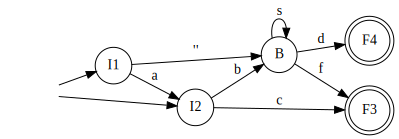

In [3]:
dotObj_nfa(nfa1)

## 1(b). Obtain the DFA of the above NFA by hand. I've given you a start.

 1. Obtain the Eclosure of the initial NFA state. That is the DFA's initial state. Which is `I1_I2_B`.
     1. When we go from `I1_I2_B` (set of states corresponding to the Eclosure) and give that state 'a', it goes to `I2`. _(This is no longer the initial state of the DFA, and hence called `I2`, for the markdown processor to understand.)_
    <!-- 3. Finish the remaining steps below.
    Show your work by typing in the Eclosure details of each step wherever there is a $\varepsilon$ involved in a given DFA state
    For DFA states where there is no $\varepsilon$ involved, just show the final Eclosed result.
    Use as many bullets as necessary to clearly show your work: -->
     0. When in state `I1_I2_B` and `'b'` is given, it goes to `B`.
     0. When in state `I1_I2_B` and `'c'` is given, it goes to `F3`.
     0. When in state `I1_I2_B` and `'d'` is given, it goes to `F4`.
     0. When in state `I1_I2_B` and `'f'` is given, it goes to `F3`.
     0. When in state `I1_I2_B` and `'s'` is given, it goes to `B`.
 
 0. Now we have 4 states (`{I2, B, F3, F4}`) that we know must exist in the DFA, so we must find the Eclosure of all of them and figure out the next state given each symbol in $\Sigma$.

     1. Obtain the Eclosure of _`I2`_ That is the Determinanistic State of `I2`.  Which is _`I2`_.
         1. When in state _`I2`_ and `'a'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state _`I2`_ and `'b'` is given, it goes to `B`.
         0. When in state _`I2`_ and `'c'` is given, it goes to `F3`.
         0. When in state _`I2`_ and `'d'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state _`I2`_ and `'f'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state _`I2`_ and `'s'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.

     0. Obtain the Eclosure of `B` That is the Determinanistic State of `B`.  Which is `B`.
         1. When in state `B` and `'a'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `B` and `'b'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `B` and `'c'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `B` and `'d'` is given, it goes to `F4`.
         0. When in state `B` and `'f'` is given, it goes to `F3`.
         0. When in state `B` and `'s'` is given, it goes to `B`.

     0. Obtain the Eclosure of `F3` That is the Determinanistic State of `F3`.  Which is `F3`.
         1. When in state `F3` and `'a'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `F3` and `'b'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `F3` and `'c'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `F3` and `'d'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `F3` and `'f'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `F3` and `'s'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.

     0. Obtain the Eclosure of `F4` That is the Determinanistic State of `F4`.  Which is `F4`.
         1. When in state `F4` and `'a'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `F4` and `'b'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `F4` and `'c'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `F4` and `'d'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `F4` and `'f'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `F4` and `'s'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.

 0. Everything now points at an Eclosure of a State or a/the Black-Hole (`BH`) (Which points to itself for all inputs).
      Therefore we have found the Deterministic version of our NFA (_aka_ we found a DFA for oru NFA).

    <!--  0. Obtain the Eclosure of `BH` That is the Determinanistic State of `BH`.  Which is `BH`.
         1. When in state `BH` and `'a'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `BH` and `'b'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `BH` and `'c'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `BH` and `'d'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `BH` and `'f'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_.
         0. When in state `BH` and `'s'` is given, it goes to `BH` _(nowhere/Black-Hole, $\therefore$ don't include it in markdown)_. -->

In [4]:
# DFA of nfa1

# dfa1 = { # - DFA Dict Representation ----
#     "Q": {'I1_I2_B', 'I2', 'B', 'F3', 'F4', 'BH'},
#     "Sigma": {'', 'a', 'b', 'c', 'd', 'f', 's'},
#     "Delta": {
#         ('I1_I2_B', 'a'): 'I2',
#         ('I1_I2_B', 'b'): 'B',
#         ('I1_I2_B', 'c'): 'F3',
#         ('I1_I2_B', 'd'): 'F4',
#         ('I1_I2_B', 'f'): 'F3',
#         ('I1_I2_B', 's'): 'B',
#         ('I2','a'): 'BH',
#         ('I2', 'b'): 'B',
#         ('I2', 'c'): 'F3',
#         ('I2', 'd'): 'BH',
#         ('I2','f'): 'BH',
#         ('I2','s'): 'BH',
#         ('B','a'): 'BH',
#         ('B','b'): 'BH',
#         ('B','c'): 'BH',
#         ('B','d'): 'F4',
#         ('B','f'): 'F3',
#         ('B', 's'): 'B',
#         ('F3','a'): 'BH',
#         ('F3','b'): 'BH',
#         ('F3','c'): 'BH',
#         ('F3','d'): 'BH',
#         ('F3','f'): 'BH',
#         ('F3','s'): 'BH',
#         ('F4','a'): 'BH',
#         ('F4','b'): 'BH',
#         ('F4','c'): 'BH',
#         ('F4','d'): 'BH',
#         ('F4','f'): 'BH',
#         ('F4','s'): 'BH',
#         ('BH','a'): 'BH',
#         ('BH','b'): 'BH',
#         ('BH','c'): 'BH',
#         ('BH','d'): 'BH',
#         ('BH','f'): 'BH',
#         ('BH','s'): 'BH'
#     },
#     "q0": 'I1_I2_B',
#     "F": {'F3', 'F4'},
# }

dfa1 = md2mc('''DFA

I1_I2_B : a -> _I2

!! ...show the rest of your work...

I1_I2_B : b     -> B
I1_I2_B : c|f   -> F3
I1_I2_B : d     -> F4
I1_I2_B : s     -> B

_I2 : b -> B
_I2 : c -> F3

B   : d -> F4
B   : f -> F3
B   : s -> B
''')

Generating LALR tables


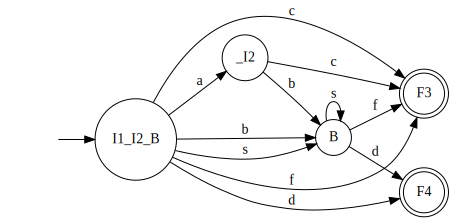

In [5]:
dotObj_dfa(dfa1)

## 1(c). Reverse nfa1 by hand, below. In doing so, it is helpful for me to suggest state renamings for you

1) Change F3 to I3

2) Change F4 to I4

3) Change I1 and I2 to F1 and F2

4) Now, reverse the transitions of nfa1, obtaining "rnfa1" below
 

In [11]:
# There is no Jove function to reverse automatically - do it by hand!

rnfa1 = md2mc('''
NFA

F2  : a -> F1

B   : ''-> F1
B   : b -> F2
B   : s -> B

I3  : c -> F2
I3  : f -> B

I4  : d -> B

''')

Generating LALR tables


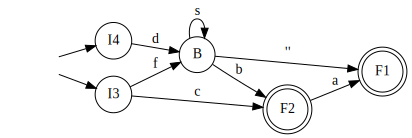

In [12]:
dotObj_nfa(rnfa1)

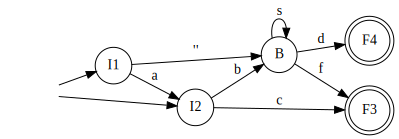

In [13]:
dotObj_nfa(nfa1)

## 1(d). Inspect and conclude that rnfa1 is truly the reverse of nfa1


### List the first six strings in numeric order and check that they have been correctly reversed. 

State the string in the original machine and explain (by specifying a path as a sequence of states) that this string is present in the reversed machine also.

<!--
| n | `nfa1` str    | `nfa1` State Seq              | `rnfa1` rev str   | `rnfa` State Seq                  |
|:-:|:-------------:|:-----------------------------:|:-----------------:|:----------------------------------|
| 1 | `"abd"`       | `I1`->`I2`->`B`->`F4`         | `"bda"`           | `I4`->`B`->`F2`->`F1`             |
 -->

1. `nfa1`:  "abc"   _via_   `I1` -> `I2` -> `F3`                            &emsp;&emsp;        `rnfa1`:    "cba"   _via_   `I3` -> `F2` -> `F1`

2. `nfa1`:  "absd"  _via_   `I1` -> `I2` -> `B` -> `B` -> `F4`              &emsp;&emsp;        `rnfa1`:    "dsba"  _via_   `I4` -> `B` -> `B` -> `F2` -> `F1`

3. `nfa1`:  "bf"    _via_   `I2` -> `B` -> `F3`                             &emsp;&emsp;        `rnfa1`:    "fb"    _via_   `I3` -> `B` -> `F2`

4. `nfa1`:  "bsssf" _via_   `I2` -> `B` -> `B` -> `B` -> `B` -> `F3`        &emsp;&emsp;        `rnfa1`:    "fsssb" _via_   `I3` -> `B` -> `B` -> `B` -> `B` -> `F2`

5. `nfa1`:  "ssd"   _via_   `I1` -> `B` -> `B` -> `B` -> `F4`               &emsp;&emsp;        `rnfa1`:    "dss"   _via_   `I4` -> `B` -> `B` -> `B` -> `F1`

6. `nfa1`:  "ssssf" _via_   `I1` -> `B` -> `B` -> `B` -> `B` -> `B` -> `F3` &emsp;&emsp;        `rnfa1`:    "fssss" _via_   `I3` -> `B` -> `B` -> `B` -> `B` -> `B` -> `F1`

 
 

In [16]:
AnimateNFA(nfa1, FuseEdges=False)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))
AnimateNFA(rnfa1, FuseEdges=False)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

# 2. Extraction of RE by Inspection (XL) and other things before it


## 2(a). You can totalize `dfa1` to obtain the totalized machine

* Explain `totalize_dfa` in a few sentences below, by looking at the $\delta(S,i)$ before and After

In [31]:
tdfa1 = totalize_dfa(dfa1)

In [45]:
tdfa1

{'Q': {'B', 'BH', 'F3', 'F4', 'I1_I2_B', '_I2'},
 'Sigma': {'a', 'b', 'c', 'd', 'f', 's'},
 'Delta': {('I1_I2_B', 'a'): '_I2',
  ('I1_I2_B', 'b'): 'B',
  ('I1_I2_B', 'c'): 'F3',
  ('I1_I2_B', 'f'): 'F3',
  ('I1_I2_B', 'd'): 'F4',
  ('I1_I2_B', 's'): 'B',
  ('_I2', 'b'): 'B',
  ('_I2', 'c'): 'F3',
  ('B', 'd'): 'F4',
  ('B', 'f'): 'F3',
  ('B', 's'): 'B',
  ('_I2', 'd'): 'BH',
  ('_I2', 's'): 'BH',
  ('_I2', 'a'): 'BH',
  ('_I2', 'f'): 'BH',
  ('B', 'c'): 'BH',
  ('B', 'a'): 'BH',
  ('B', 'b'): 'BH',
  ('F4', 'd'): 'BH',
  ('F4', 'c'): 'BH',
  ('F4', 's'): 'BH',
  ('F4', 'a'): 'BH',
  ('F4', 'f'): 'BH',
  ('F4', 'b'): 'BH',
  ('F3', 'd'): 'BH',
  ('F3', 'c'): 'BH',
  ('F3', 's'): 'BH',
  ('F3', 'a'): 'BH',
  ('F3', 'f'): 'BH',
  ('F3', 'b'): 'BH',
  ('BH', 'd'): 'BH',
  ('BH', 'c'): 'BH',
  ('BH', 's'): 'BH',
  ('BH', 'a'): 'BH',
  ('BH', 'f'): 'BH',
  ('BH', 'b'): 'BH'},
 'q0': 'I1_I2_B',
 'F': {'F3', 'F4'}}

In [46]:
dfa1

{'Q': {'B', 'F3', 'F4', 'I1_I2_B', '_I2'},
 'Sigma': {'a', 'b', 'c', 'd', 'f', 's'},
 'Delta': {('I1_I2_B', 'a'): '_I2',
  ('I1_I2_B', 'b'): 'B',
  ('I1_I2_B', 'c'): 'F3',
  ('I1_I2_B', 'f'): 'F3',
  ('I1_I2_B', 'd'): 'F4',
  ('I1_I2_B', 's'): 'B',
  ('_I2', 'b'): 'B',
  ('_I2', 'c'): 'F3',
  ('B', 'd'): 'F4',
  ('B', 'f'): 'F3',
  ('B', 's'): 'B'},
 'q0': 'I1_I2_B',
 'F': {'F3', 'F4'}}

### Your explanation of `totalize_dfa()`

  - Since a DFA is deterministic it requires an outgoing path for every symbol in its $\Sigma$ in every state it has.
      For breavity in our markdown syntax we can ommit anything that woud just go to a _"black hole state"_ and `jove` is coded to account for this. 
      Plus in our dot object diagrams of the DFA's it is easier to understand if we ommit paths to any said _"black hole state"_, 
      and we just assume that if a path for a symbol does not have a path out of this state that we can just asshume it goes to a _"black hole state"_.

  - A _"black hole state"_ is a **non**-final-state that all paths out of it can never reach a final state 
      (usualy this means they lead back to itself).

  - Therefore, the `totalize_dfa()` function just takes a look at all the states in a DFA (_i.e._ $Q$)
      and checks to see that every state $S\in Q$ has a path/function in $\delta(S,i)$ for every symbol $i\in\Sigma$.
      If a state $S\in Q$ does not have a path/function in $\delta(S,i)$ for a symbol $i\in\Sigma$ 
      then create a $\delta(S,i)$ that returns the _"black hole state"_ $S_{BH}\in Q$.



##  A printout may look the same ... till you print w_bh 

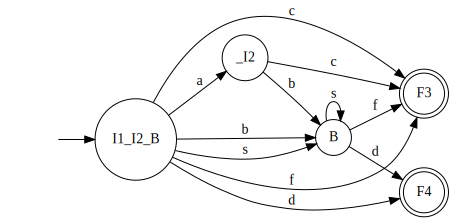

In [47]:
dotObj_dfa(tdfa1)

##  Let us print with blackhole

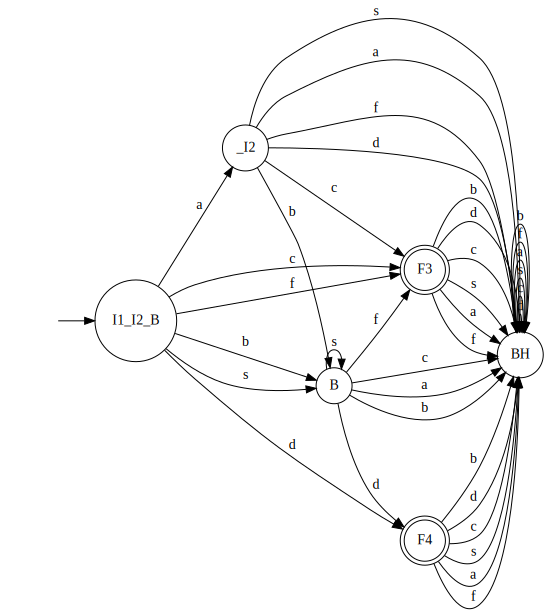

In [48]:
dotObj_dfa_w_bh(tdfa1)

### Was it a good idea to not always show black-holes?
Yeah for the most part it makes teh DFAs far easier to read.

### In what circumstances might you still need to apply the `*_w_bh` view option?
  - When you are minimizing a DFA that for some reason has more then one _"black hole state"_ that could be simplified down to 1 _"black hole state"_
  - When you need to teach/explain how a DFA works, or how it is different to an NFA.


## 2(b) Obtain an RE by looking at nfa1

* Follow all paths

* Summarize the paths in your head, using the Star operator suitably




In [50]:
RE1_hand = "((ab+b+'')s*(d+f))+(ac+c)"

## 2(c) Reverse RE1 by hand to obtain Rev_RE1

Once you have an RE, you can "visually reverse it" for simple REs

In [52]:
Rev_RE1_hand = "((d+f)s*(ba+b+''))+(ca+c)"

## 2(d) Understand del_gnfa_states via help

In [53]:
# help of del_gnfa_states run below
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



### Document what you learned from the function help of del_gnfa_states and summarize below

  - Take a (G)NFA and slowly break it down so that it is just an initial state and a final state with with some paths w/ RE that when unioned together fully describe the (G)NFA.

  - It also returns a list of `dotObj`s (pics of the nfa machien) that show the (G)NFA at every stage of the trim down process.

  - The last thing in the tupple it returns is the string representation of the RE that describes the (G)NFA (also the RE for the only path in the trimed down (G)NFA).

# 3. Converting to GNFA and Attempting Two Elimination Orders (AR)

Work on `rnfa1` to obtain `Rev_RE1` and `Rev_RE2` 

## Obtain grnfa1 below via a suitable command

In [54]:
grnfa1 = mk_gnfa(rnfa1)

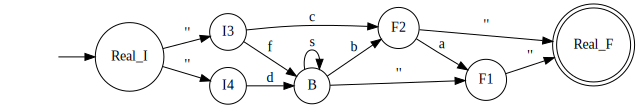

In [55]:
dotObj_gnfa(grnfa1)

## 3(b,c) i : Apply the elimination order by supplying the second argument 
`['B', 'F2', 'F1', 'I3', 'I4']`

as you learned in the help

In [74]:
(Gfinal, DO, Rev_RE1) = del_gnfa_states(grnfa1, ['B', 'F2', 'F1', 'I3', 'I4'])

**** Eliminating state B ****
**** Eliminating state F2 ****
**** Eliminating state F1 ****
**** Eliminating state I3 ****
**** Eliminating state I4 ****


In [57]:
Rev_RE1

'((((((((d ((s)* b)) a) + (d (s)*)) + (d (s)*)) + (d ((s)* b))) + (d ((s)* b))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c)))'

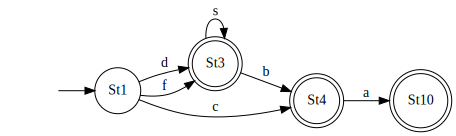

In [58]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))))

In [77]:
len(DO)

6

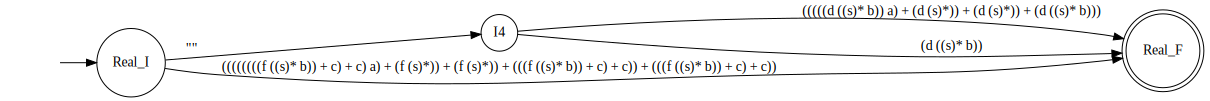

In [84]:
step=4
DO[step]

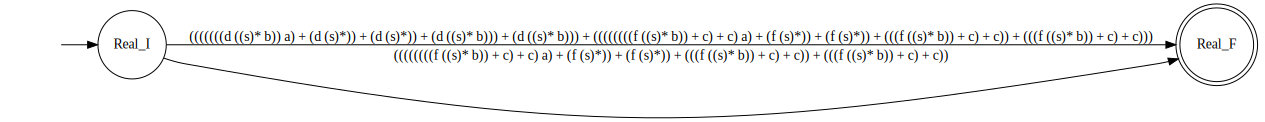

In [85]:
DO[step+1]

## Examine `DO[0]` through `DO[Last_Legal_Item]` (find out how long DO is)

`DO[0]` is the initial GNFA machine, `DO[1]` is the next one, and so on. You will see each step getting
rid of one state.

### \[\[ ...UPDATED WORDING...\]\] Summarize your observation of the state elimination and which REs were introduced as a result. Pick TWO cases, one of which involves the removal of a state with a self-loop. Use one bullet per question case discussed.

  - The original NFA was turned into a GNFA (aka a `Real_I` and `Real_F` states were inserted as the actual Initial and Final states respectivly, by connecting them with $\varepsilon$ paths).

  - Deleted state `B`, all possible paths to and from it replaced with RE (this seems like a bad place to start for keeping things simple). 
      This created some very complicated RE to bridge the gaps and left only the old initial and final states.

  - Deleted state `F2` (the only other state remaining with a paths that were not $\varepsilon$ or a _proper_ RE), all possible paths to and from it were replalced with RE.

  - Deleted state `F1` all possible paths to and from it replaced with RE (this is far simpler as it just unions the 4 paths RE's into one RE using more `()`'s then nessisary.).

  - Deleted state `I3` all possible paths to and from it replaced with RE,
      since the only path into `I3` was a $\varepsilon$ path it just unioned the 2 outgoing paths RE.

  - Deleted state `I4` all possible paths to and from it replaced with RE,
      since the only path into `I3` was a $\varepsilon$ path it just unioned the 2 outgoing paths RE.

## 3(b,c) ii : Apply the elimination order by supplying the second argument 
 `['I3', 'I4', 'F1', 'B', 'F2' ]`

as you learned in the help

In [86]:
(Gfinal, DO, Rev_RE2) = del_gnfa_states(grnfa1, ['I3', 'I4', 'F1', 'B', 'F2' ])

**** Eliminating state I3 ****
**** Eliminating state I4 ****
**** Eliminating state F1 ****
**** Eliminating state B ****
**** Eliminating state F2 ****


In [87]:
Rev_RE2

'((((((((d + f) + f) ((s)* b)) + c) + c) ((a + "") + "")) + (((d + f) + f) (s)*)) + (((d + f) + f) (s)*))'

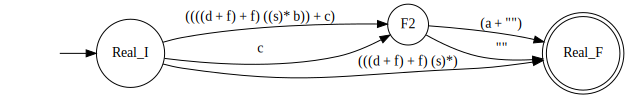

In [98]:
step = 4
DO[step]

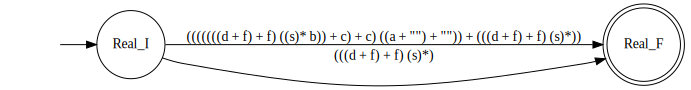

In [99]:
DO[step+1]

## Examine `DO[0]` through `DO[Last_Legal_Item]` (find out how long DO is)

### \[\[ Slightly Updated Wording \]\] Summarize your observation of the state elimination and which REs were introduced as a result (using the same guidelines as with `Rev_RE1` above.

- The original NFA was turned into a GNFA (aka a `Real_I` and `Real_F` states were inserted as the actual Initial and Final states respectivly, by connecting them with $\varepsilon$ paths).

  - Deleted state `I3`, since it only had a $\varepsilon$ path leading into it all teh paths were just moved to come from `Real_I` instread.
      (this seems like a far better place to start to keep the process and the RE simple then the previouse state order). 

  - Deleted state `I4`, all possible paths to and from it were replalced with RE.
      Which for this means just union the two paths symbols to make an RE.

  - Deleted state `F1` all possible paths to and from it replaced with RE.
      Since `F1` and `F2` just lead to the same node in the end the path between was unioned with the other out path from `F2`, 
      and the $\varepsilon$ path was redirected directly to `Real_F`.

  - Deleted state `B` all possible paths to and from it replaced with RE (This is the most complicated step so far due to teh complexity fo the `B` state).
      The REs yeilded by this process were far simpler then was yeilded when deleting `B` in the order we did for the previouse problem.

  - Deleted state `F2` all possible paths to and from it replaced with RE, which just means unioning all of the RE in paths to the RE of the non-$\varepsilon$ out path.

## 3(d)i Check for isomorphism as requested between `Rev_RE1` and `Rev_RE2`

Apply a Jove call that is compact (and is in my lecture slides) that checks that `Rev_RE1` and `Rev_RE2` 
are equivalent. It has to involve `iso_dfa()` and `min_dfa()` and other calls.

In [100]:
iso_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))), min_dfa(nfa2dfa(re2nfa(Rev_RE2))))

True

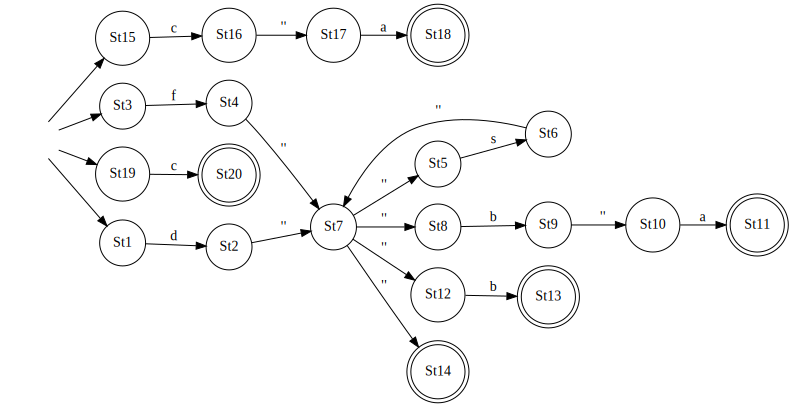

In [101]:
# Just look at it again for comparison

dotObj_nfa(re2nfa(Rev_RE1_hand))

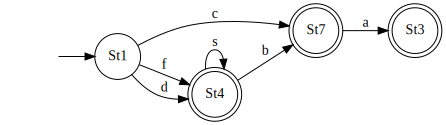

In [103]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1_hand))))

## 3(d)i Check for isomorphism as requested between `Rev_RE1` and `Rev_RE1_hand`

Same methods as above.

In [104]:
iso_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))), min_dfa(nfa2dfa(re2nfa(Rev_RE1_hand))))

True

# Chasing down the `RE2NFA` components (SV)

Find out where the `s*` components are and explain the set of all strings that precede `s*` in `Rev_RE2` and the NFA of `Rev_RE2`

Find out where the ending `"a"` is, and find out the set of all the symbols that precede a

Let's first look at the NFA and then see where the RE "parts" are in it.

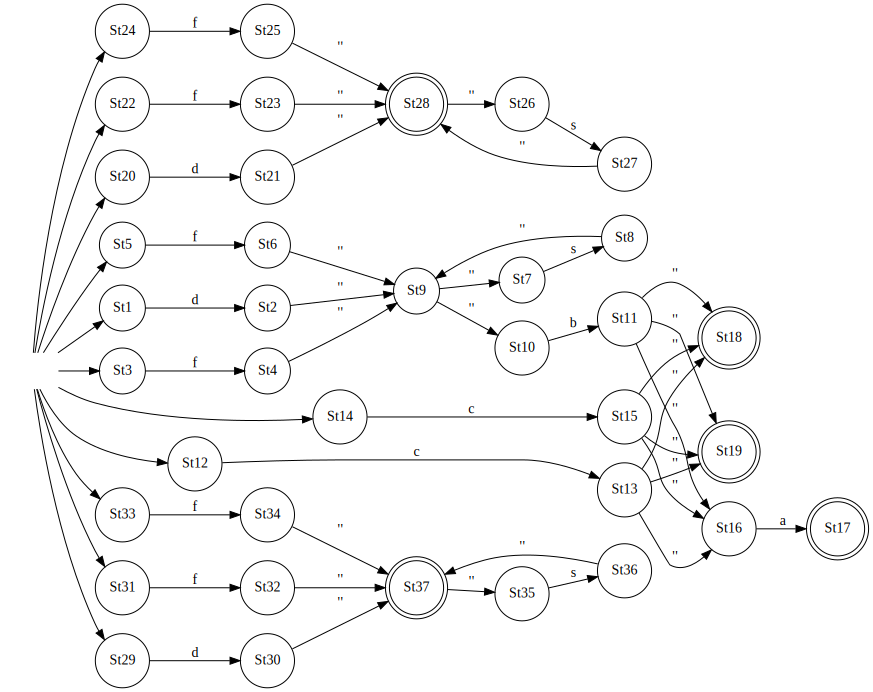

In [105]:
dotObj_nfa(re2nfa(Rev_RE2))

## Chasing down the RE2NFA components (SV) - details


This is an exercise in explaning how `Rev_RE2` got translated to an NFA. You are to pick these cases and find an example of each, and explain below. What you pick does not matter.

* Find a case where a Star is used, and explain the construction, pointing to the states involved. Use up to 6 bullets below. More or less based on how you explain (clarity not length emphasized).
  - Every location where a `s*` is used the NFA inserts 2 states lets call them `Star1` `Star2` and (in adition to whatever state came before lets call it _"`Star0`"_ temporarily).
  - A path from _"`Star0`"_ to `Star1` is defined for case $\varepsilon$.
  - A path from `Star1` to `Star2` is defined for case `'s'`.
  - A path from `Star2` to _"`Star0`"_ is defined for case $\varepsilon$.
  - (This seems largly wasteful for a single character/symbol `*` pattern, but is more nessisary if you have a whole RE pattern in `()`'s being starred)

* Find a case where the Star follows something (I.e. a concatenation of the form "X" followed by "Star" is used). Show how that concatenation construction is accomplished in the same manner (up to 6 bullets roughly) as above. More or less based on how you explain.
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...
  
* Find a case where something follows Star (I.e. a concatenation of the form "Star" followed by "X"). Explain how the concatenation is accomplished.
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...

## Repeat finding out the aforesaid paths in your own `Rev_RE1_hand`


This is an exercise in explaning how `Rev_RE1_hand` got translated to an NFA. You are to pick these cases and find an example of each, and explain below. What you pick does not matter.

* Find a case where a Star is used, and explain the construction, pointing to the states involved. Use up to 6 bullets below. More or less based on how you explain (clarity not length emphasized).
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...

* Find a case where the Star follows something (I.e. a concatenation of the form "X" followed by "Star" is used). If such a case does not arise in your RE, skip this part. Show how that concatenation construction is accomplished in the same manner (up to 6 bullets roughly) as above. More or less based on how you explain. 
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...
  
* Find a case where something follows Star (I.e. a concatenation of the form "Star" followed by "X"). If such a case does not arise in your RE, skip this part. Explain how the concatenation is accomplished.
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...

# END
